## **Introduction**

The focus of this project is to observe the evolution and changes of Bitcoin data considering the progress of data in recent years such as date, bid price, high, low days. Additionally, this project will show the changes of Bitcoin by some visualization techniques and datasets which you can find below.



##**Datasets**
- https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing
- https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
- https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd

## **Exploratory Data Analysis**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from os import listdir

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive/Bitcoin'

Mounted at ./drive


In [3]:
# Uploading our first dataset
filename = "BTC-USD.csv"
df = pd.read_csv(join(path_prefix, filename))

**We can first take a look at some statistics of our dataset.**

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


**Number of Rows and Columns of our dataset**

In [5]:
# It has 2755 rows and 7 columns.
df.shape

(2788, 7)

**Let's also see types of values in each column.**


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**See some sample entries below**

In [7]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
433,2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
1064,2017-08-16,4200.339844,4381.229980,3994.419922,4376.629883,4376.629883,2272039936
114,2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600
1984,2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641,9663.181641,35838025154
2450,2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190


**Check if there are any null values.**

In [8]:
null_df = df.apply(lambda x: sum(x.isnull())).to_frame(name="count")
print(null_df)

           count
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0


**Highest openings of all times!**

In [9]:
df.sort_values("Open",ascending=False).head()

,Date,Open,High,Low,Close,Adj Close,Volume
2610,2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721
2611,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,48730828378
2591,2021-10-21,66002.234375,66600.546875,62117.410156,62210.171875,62210.171875,45908121370
2616,2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,63557.871094,30558763548
2612,2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,64949.960938,35880633236


**ALL TIME HIGHS :)**

In [10]:
df.sort_values("High",ascending=False).head()

,Date,Open,High,Low,Close,Adj Close,Volume
2611,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,48730828378
2610,2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
2590,2021-10-20,64284.585938,66930.390625,63610.675781,65992.835938,65992.835938,40788955582
2591,2021-10-21,66002.234375,66600.546875,62117.410156,62210.171875,62210.171875,45908121370


**ALL TIME LOWS :(**

In [11]:
# Lowest Values of All Times
df.sort_values("Low",ascending=True).head()

,Date,Open,High,Low,Close,Adj Close,Volume
119,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704
120,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504
123,2015-01-18,200.050003,218.695007,194.505997,210.339005,210.339005,30085100
122,2015-01-17,207.834000,211.731003,194.875000,199.259995,199.259995,23469700
342,2015-08-25,210.067993,226.320999,199.567001,221.608994,221.608994,61089200


**We are also got curious about daily volatility of the BTC prices. For that, we add a new column to our dataset as follows.**

In [12]:
# Most Volatile Days
df['Daily Volatility'] = df['High'] - df['Low']
df.sort_values("Daily Volatility",ascending=False).head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Volatility
2436,2021-05-19,42944.976563,43546.117188,30681.496094,37002.441406,37002.441406,126358098747,12864.621094
2635,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,11030.062500
2547,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,9568.558594
2351,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824,8914.339844
2429,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,8788.828125


**Now, it is a good time to see change of all features based on time.**

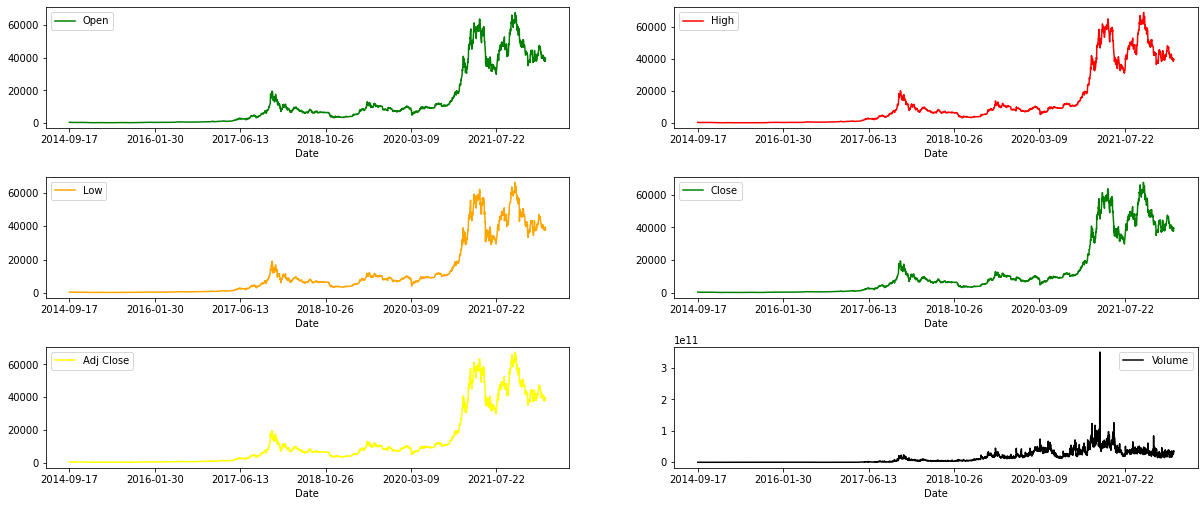

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(20,8))

df.plot('Date', 'Open', ax = axs[0, 0], color="green")
df.plot('Date', 'High', ax = axs[0, 1], color="red")
df.plot('Date', 'Low', ax = axs[1, 0], color="orange")
df.plot('Date', 'Close', ax = axs[1, 1], color="green")
df.plot('Date', 'Adj Close', ax = axs[2, 0], color="yellow")
df.plot('Date', 'Volume', ax = axs[2, 1], color="black")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    top=0.9, 
                    hspace=0.4)
plt.show()

**We can analyze the same changes with respect to volume as well.**

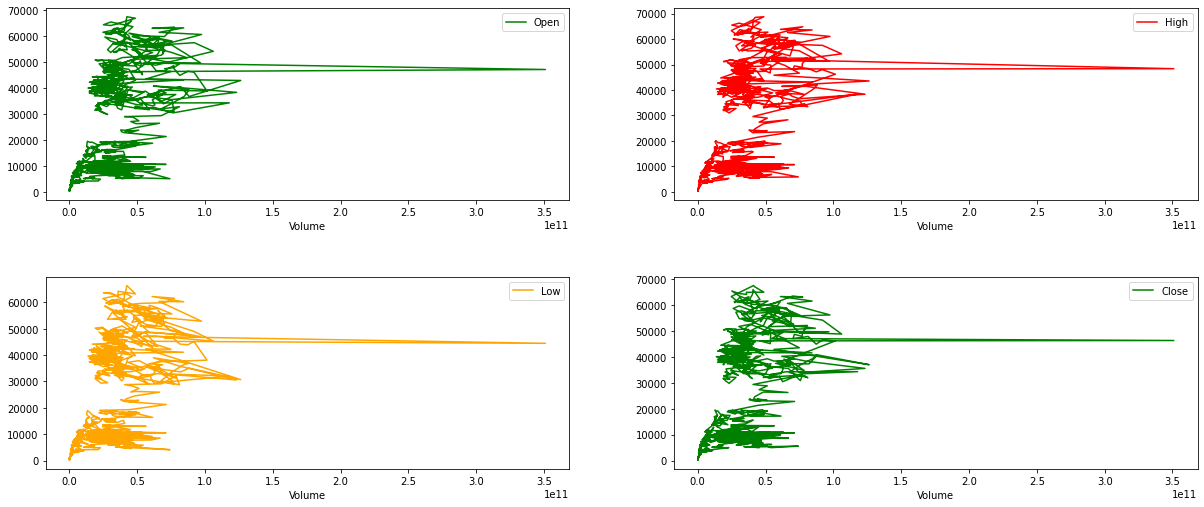

In [14]:
# Price trends based on volume.
fig, axs = plt.subplots(2, 2, figsize=(20,8))

df.plot('Volume', 'Open', ax = axs[0, 0], color="green")
df.plot('Volume', 'High', ax = axs[0, 1], color="red")
df.plot('Volume', 'Low', ax = axs[1, 0], color="orange")
df.plot('Volume', 'Close', ax = axs[1, 1], color="green")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    top=0.9, 
                    hspace=0.4)
plt.show()

It seems that there is no meaningful correlation between High, Low, Open and Close values and Volume. We can even say that they are not correlated at all! Volume going from 1.5e11 to 3.5e11 does not cause any change for the other features at all!

**Let's also see if there is any correlation between daily volatility and volume**


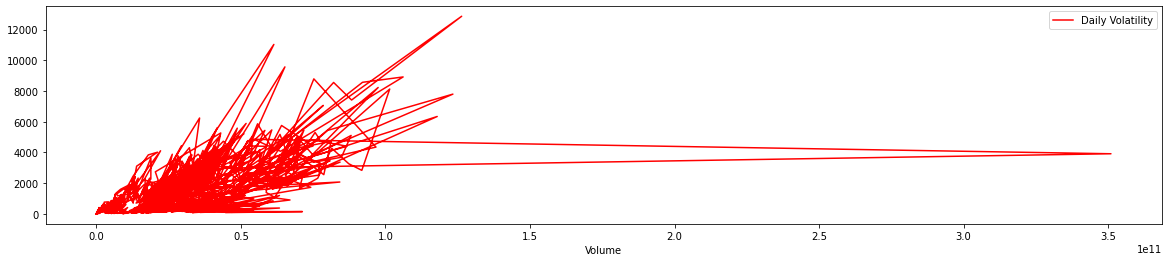

In [15]:
df.plot('Volume', 'Daily Volatility',  color="red",  figsize=(20,4))
plt.show()

It seems that there is no consistent correlation between volume and daily volatility. What about date?

**How does daily volatility change over time? Does BTC becomes less volatile more reliable as time goes on?**


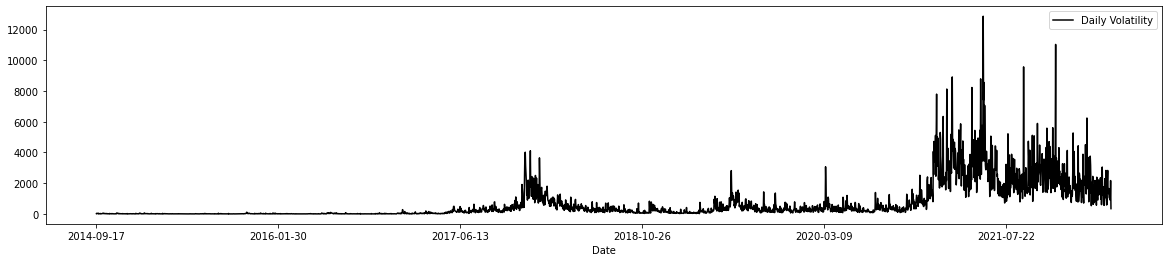

In [16]:
df.plot('Date', 'Daily Volatility',  color="black", figsize=(20,4))
plt.show()

Daily volatility plot looks very similar to High, Low, Close and Open values over time.

**We need some extra features to make better analysis. For this, we will merge some datasets with our original dataset.**

In [17]:
filename = "coin_Bitcoin.csv"
second_df = pd.read_csv(join(path_prefix, filename))
second_df.sample()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2063,2064,Bitcoin,BTC,2018-12-22 23:59:59,4014.182514,3855.738934,3898.083677,4014.182514,5.605823e+09,6.999751e+10


In [18]:
# We need to do some preprocessing before merging two datasets.
second_df['Date'] = second_df['Date'].str.replace(r' 23:59:59', '')
second_df.drop(columns=['High','Low','Open','Close','Volume','SNo','Name'], inplace=True)

In [19]:
df = pd.merge(second_df, df, on='Date')

In [20]:
#Let's also merge the third dataset.
filename = "BTC-Daily.csv"
third_df = pd.read_csv(join(path_prefix, filename))
third_df.sample()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
574,1596499200,2020-08-04 00:00:00,BTC/USD,11236.39,11420.0,11000.79,11192.42,5522.110518,6.180578e+07


In [21]:
# First, some preprocessing of course.
third_df['Date'] = third_df['date'].str.replace(r' 00:00:00', '')
third_df.drop(columns=['date', 'unix','symbol','open','high','low',"close", "Volume BTC"], inplace=True)

In [22]:
df = pd.merge(third_df, df, on='Date')

**Below samples are from the final version of our dataset with four additional features from other datasets.**

In [23]:
df.sample(3)

,Volume USD,Date,Symbol,Marketcap,Open,High,Low,Close,Adj Close,Volume,Daily Volatility
823,6.563617e+07,2019-04-05,BTC,8.879612e+10,4922.806152,5053.509766,4919.491699,5036.681152,5036.681152,16837325387,134.018067
2275,1.843286e+04,2015-04-14,BTC,3.080099e+09,224.759003,224.975998,216.322998,219.158997,219.158997,31719000,8.653000
117,3.836349e+08,2021-03-11,BTC,1.078136e+12,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,3606.468750


**It is a good idea to see correlation matrix.**

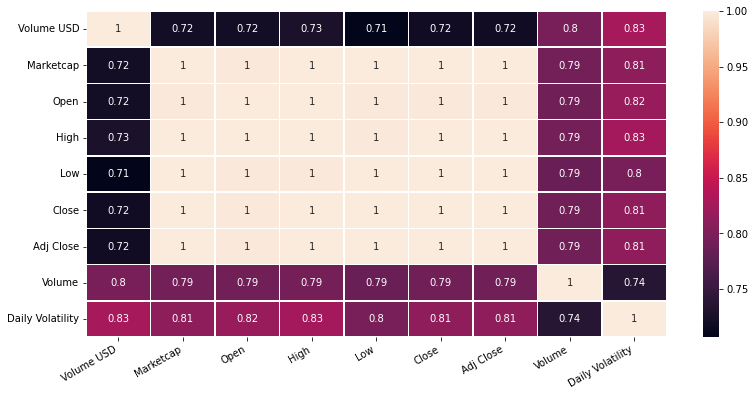

In [24]:
corr = df.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corr, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()

As we infer previously, Volume & Volume USD are the features that are least correlated with the others.

**Here are some extra questions:**




**How does Marketcap and Volume USD change over time?**

Marketcap = Share Price * Number of Shares.

We expect that marketcap of BTC to follows same trends with Low, High, Open and Close values since number of shares is relatively limited in the cryptosystem.

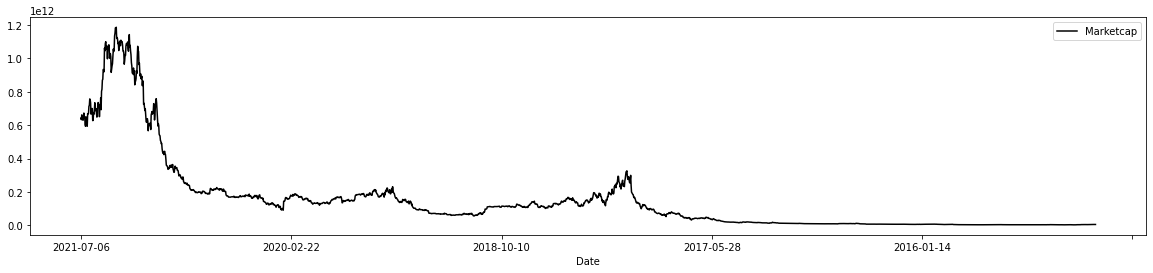

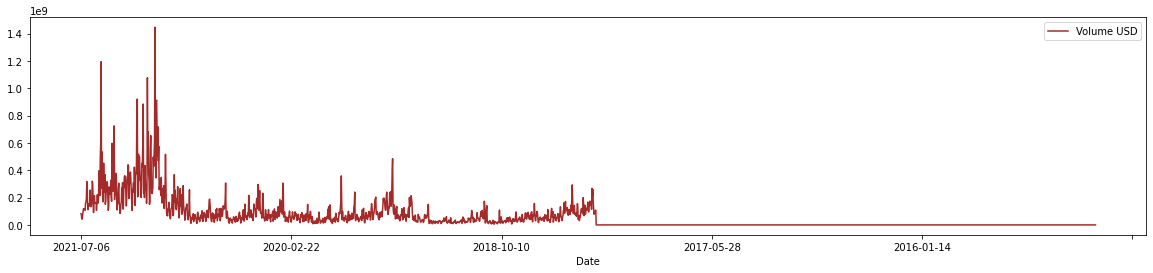

In [25]:
df.plot('Date', 'Marketcap',  color="black", figsize=(20,4))
df.plot('Date', 'Volume USD',  color="brown", figsize=(20,4))


**Date of the most volatile day?**

In [26]:
df['Date'][df['Daily Volatility'] == df['Daily Volatility'].max()]

48    2021-05-19
Name: Date, dtype: object

**Total volume of all times?**

In [27]:
df['Volume'].sum()

32612146461510

**We are curious about what are lowest and highest prices in each year!**

In [28]:
# Lowest and Highest Values of Each Year
lowestByYear = []
highestByYear = []
years = ["2014", "2015", "2016", "2017", "2018","2019", "2020","2021"]
for year in years:
  lowestByYear.append(df['Low'][df['Date'].str.startswith(year)].min())
  highestByYear.append(df['High'][df['Date'].str.startswith(year)].max())

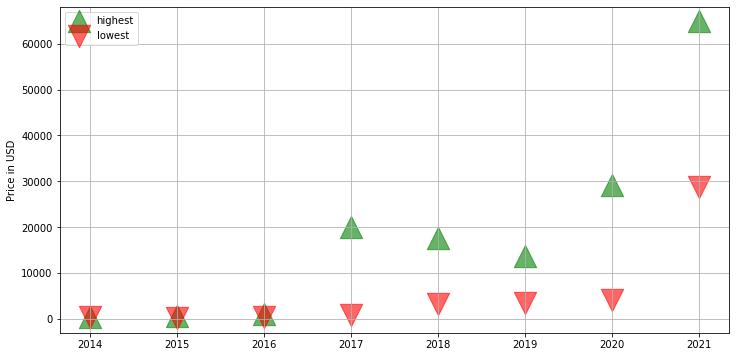

In [29]:
plt.figure(figsize=(12,6))
plt.ylabel("Price in USD")
plt.scatter(years, highestByYear, marker = "^", color="green", s = 500, alpha = 0.6, label="highest")
plt.scatter(years, lowestByYear, marker = "v", color = "red", s= 500, alpha = 0.6, label="lowest")
plt.legend()
plt.grid(True)

**Now, we will put some price ranges and check how many days BTC price was in each range.**

In [30]:
bins = [0,1000, 5000, 10000, 20000,40000,60000, float('inf')]
df['bins'] = pd.cut(df['High'], bins)
grouped = df.groupby(df['bins'])

Text(0, 0.5, '#Days')

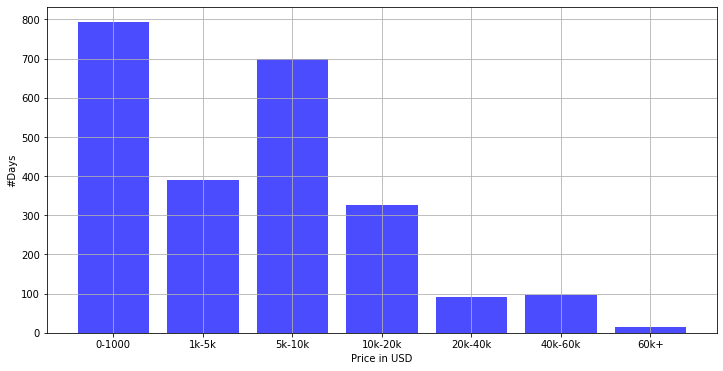

In [31]:
bins = ["0-1000","1k-5k", "5k-10k", "10k-20k","20k-40k","40k-60k","60k+"]
dayCounts = grouped['bins'].count()
freq = []
for elem in dayCounts:
  freq.append(elem)
plt.figure(figsize=(12,6))
plt.bar(bins,freq,align='center', color = "blue", alpha=0.7) # A bar chart
plt.grid()
plt.xlabel('Price in USD')
plt.ylabel('#Days')

**Finally, we compare open, close, high and low prices in 2021.**

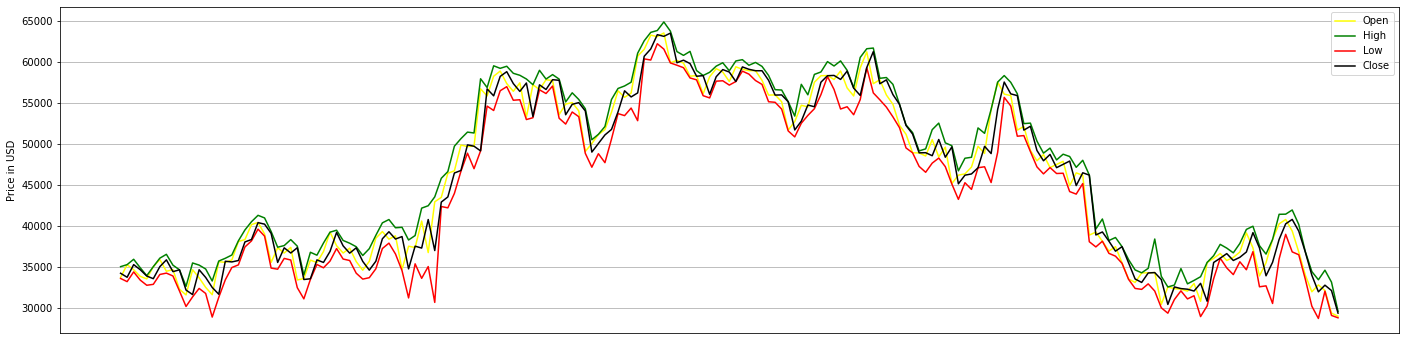

In [32]:
plt.figure(figsize=(24,6))
plt.xticks([])
plt.ylabel("Price in USD")
df_2021 = df[df['Date'].str.startswith("2021")]
plt.plot(df_2021['Date'], df_2021['Open'], color="yellow", label="Open")
plt.plot(df_2021['Date'], df_2021['High'], color="green", label="High")
plt.plot(df_2021['Date'], df_2021['Low'],  color="red",label="Low")
plt.plot(df_2021['Date'], df_2021['Close'], color="black", label="Close")
plt.legend()
plt.grid()


As the correlation matrix indicates too, these four features follow almost the same pattern of change of time. This is also valid for 2021.

##**Statistical Analysis & Hypothesis Testing**

In [33]:

df2 = df[1:2755]
df_open = df2["Open"]


df3 = df[0:2754]
df_close = df3["Close"]


df3 = df[0:2754]
df_volume = df3["Volume"]


mylist = []
new_df = pd.DataFrame(mylist)
new_df['Open'] =df2["Open"]
new_df['Close'] = df3["Close"]
new_df['Volume'] = df3["Volume"]
new_df


,Open,Close,Volume
1,35284.343750,33746.003906,26721554282
2,34665.566406,35287.781250,24924307911
3,33854.421875,34668.546875,24383958643
4,33549.601563,33897.046875,38728974942
5,35035.984375,33572.117188,37838957079
...,...,...,...
2408,379.250000,381.315002,12364100
2409,378.248993,379.244995,11763000
2410,375.510010,378.046997,9194440
2411,376.152008,375.490997,15375600



We conduct hypothesis testing to see if there is significant statistical differences between high and low prices with respect to open and close prices of the same day. As a method, we compare the high/low ratio to open/close ratio of days.



In [34]:
df['Open - Close Ratio'] = df['Open']/df['Close']

df['High - Low Ratio'] = df['High']/df['Low']

df['OC - HL RATIO'] = df['High - Low Ratio']/df['Open - Close Ratio'] 

df['OC - HL RATIO'].mean()
#df['OC - HL RATIO'].std()

1.0511093446844517

Mean of high/low ratio to open/close ratio is 1.05. So this is our null hypothesis.

NULL HYPOTHESIS (H0): Ratio of High/Low to Open/Close = 1.05
ALTERNAVTIVE HYPOTHESIS (HA):  Ratio of High/Low to Open/Close ≠ 1.05

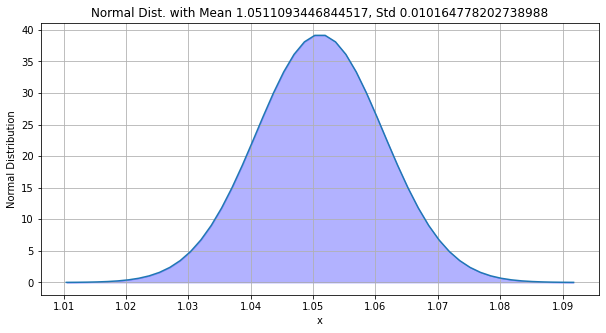

In [35]:
from scipy import stats
from scipy import special

# mean and std values from the sample
df_sample = df.sample(50)
std1 = df_sample['OC - HL RATIO'].std()
sample_mean = df_sample['OC - HL RATIO'].mean()




n = 50
mean = df['OC - HL RATIO'].mean()
std = std1 / np.sqrt(n)
offset = 4*std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

### Z Score

$\Large{Z = \frac{\bar{x}_{sample} - \mu_{sampling \, dist.}}{\sigma_{sampling \, dist.}}}$

We can use the **z-scores** and find how many standard deviations away the sample mean (drugged rats) is from the population mean. **bold text**

In [43]:
# mean and std values from the sample
n = 50
# mean = 1.2
std = mean / np.sqrt(n)

# sample mean (drugged rats)
# sample_mean = 1.05

# calculating the z-score
z_score = (  mean - sample_mean) / std

print("z-score: {}".format(z_score))

z-score: 0.020224839471807577


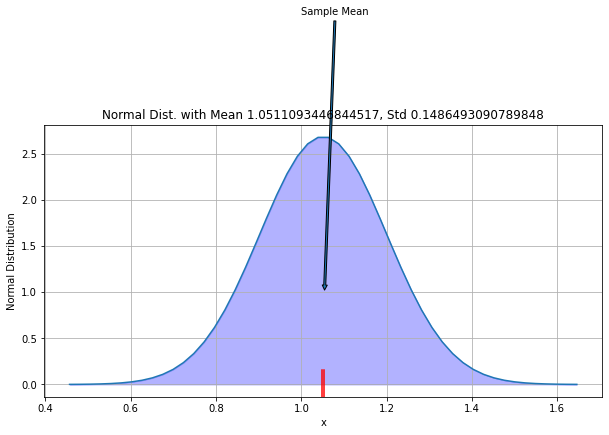

In [37]:

n = 50

offset = 4*std


x = np.linspace(mean - offset, mean + offset, n)


y = stats.norm.pdf(x,mean,std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')

plt.axvline(mean - z_score*std, ymax=0.1, color="red")
plt.axvline(mean + z_score*std, ymax=0.1, color="red")
# annotate the sample mean
plt.annotate(
    "Sample Mean",
    xy=(mean + z_score*std, 1), 
    xytext=(1, 4), 
    arrowprops={"arrowstyle": "simple"}) 
plt.title('Normal Dist. with Mean {}, Std {}'.format(mean, std))
plt.show()

In [38]:
# calculating the probability
# multiply by 2 to consider both ends
prob = 2*stats.norm.cdf(z_score)

print(f"probability: {prob}")

probability: 1.0161359870966344


The probability is way higher than the significant value (0.05). So we fail to reject the null hypothesis.

### Open Price - High Price Relationship





Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day

In [44]:
from scipy import stats
from scipy import special

In [45]:
df.sort_values("Open",ascending=False).head()

,Volume USD,Date,Symbol,Marketcap,Open,High,Low,Close,Adj Close,Volume,Daily Volatility,bins,Open - Close Ratio,High - Low Ratio,OC - HL RATIO
83,3.780988e+08,2021-04-14,BTC,1.179061e+12,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,77451779687,3308.300781,"(60000.0, inf]",1.006561,1.053746,1.046877
81,3.550288e+08,2021-04-16,BTC,1.150457e+12,63258.503906,63594.722656,60222.531250,61572.789063,61572.789063,84293007468,3372.191406,"(60000.0, inf]",1.027378,1.055996,1.027855
82,2.171286e+08,2021-04-15,BTC,1.182945e+12,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,60954381579,1612.707031,"(60000.0, inf]",0.996228,1.025924,1.029808
80,1.855888e+08,2021-04-17,BTC,1.133882e+12,61529.921875,62572.175781,60361.351563,60683.820313,60683.820313,66138759198,2210.824218,"(60000.0, inf]",1.013943,1.036626,1.022372
114,1.932269e+08,2021-03-14,BTC,1.106226e+12,61221.132813,61597.917969,59302.316406,59302.316406,59302.316406,43901225564,2295.601563,"(60000.0, inf]",1.032357,1.038710,1.006154


We sort the dataframe with respect to opening prices. We split the data into two parts, one with high openings and the low openings. When we conduct the two sample t-test we find p value less than the significance level (0.05). So we fail to reject the hypothesis testing.

H0 = Opening price effects the high price for that day.
HA = Opening price does not effect the high price for that day.

In [48]:
lower_opens = df[0:1211]
low_array = lower_opens[['High']] 



higher_opens = df[1212:2413]
high_array = higher_opens[['High']] 

print (lower_opens["High"].mean())

print (higher_opens["High"].mean())

14607.25082036912
2220.7680053705244


In [49]:
stats.ttest_ind(low_array, high_array)  # since we have not equal variances

Ttest_indResult(statistic=array([28.07431592]), pvalue=array([2.74858564e-150]))

## Price Prediction using Machine Learning

In this part, we will implement an LSTM model to predict Bitcoin prices. Our aim is to predict the open price of a single day given all data of previous 30 days.

Let's import the necessary libraries first.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [51]:
open_df = df[['Date','Open']]
print("Shape of open dataframe:", open_df.shape)

Shape of open dataframe: (2413, 2)


In [52]:
fig = px.line(open_df, x=open_df.Date, y=open_df.Open,labels={'date':'Date','open':'Open Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Open Price of Bitcoin', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Let's copy our open_df so that we can use this original one for the comparison later.

In [53]:
open_stock = open_df.copy()

We should normalize the values and delete "Date" field to feed data in our LSTM model.

In [54]:
del open_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
open_df=scaler.fit_transform(np.array(open_df).reshape(-1,1))

In this part, we will split our open_df data into train and test datasets. We will use 70% of the entire data for training.

In [55]:
training_size=int(len(open_df)*0.70)
test_size=len(open_df)-training_size
train_data,test_data=open_df[0:training_size,:],open_df[training_size:len(open_df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1689, 1)
test_data:  (724, 1)


We need to preprocess our data so that it represents sequences in order to feed it to our LSTM model.

In [56]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Time step is the number of days we will look to predict the next day. So, we set it to 30.

In [57]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1658, 30)
y_train:  (1658,)
X_test:  (693, 30)
y_test (693,)


We also need to reshape input to be [samples, time steps, features] which is required for LSTM.

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1658, 30, 1)
X_test:  (693, 30, 1)


Now, it is time to create our LSTM mode.

In [59]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics='accuracy')

We will first try with 50 epochs and see the accuracy.

In [60]:
history = model.fit(X_train, y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.2, 
    verbose=0)

In [61]:
mse, acc = model.evaluate(X_test, y_test)
print("mean square error = ", mse)

22/22 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.0014
mean square error =  0.004350724630057812


### HyperParameter Tuning

As an effort of hyperparameter tuning, we can also use 200 epochs and see if the performance is improved or not.

In [62]:
history = model.fit(X_train, y_train,
    batch_size=512,
    epochs=200,
    validation_split=0.2, 
    verbose=0)

As you can see below, with 200 epochs instead of 50, we got better performance and lower mean square error.

In [63]:
mse, acc = model.evaluate(X_test, y_test)
print("mean square error = ", mse)

22/22 [==============================] - 0s 3ms/step - loss: 1.2106e-04 - accuracy: 0.0014
mean square error =  0.00012106063513783738


### Testing our Model

In [64]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [65]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

We can visualize our predictions together with the actual prices to see if the model is succesful.

In [66]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(open_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(open_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(open_df)-1, :] = test_predict

names = cycle(['Original open price','Train predicted open price','Test predicted open price'])


plotdf = pd.DataFrame({'date': open_stock['Date'],
                       'original_open': open_stock['Open'],
                      'train_predicted_open': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_open': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_open'],plotdf['train_predicted_open'],
                                          plotdf['test_predicted_open']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original open price vs predicted open price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Open Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

As it can be seen above plot, our model works very succesfully both for train and test data.

## Simple Recommendation System

In this part, we create a simple recommendation system whether to buy/sell Bitcoin on a given day. Given a specific day, our system looks the next 30 days and checks if it is predicted that the price will drop/increase by 10% of the price on that day.

If the price is expected to increase at least by 10% in the following 30 days, we recommend the user to buy Bitcoin. If it is expected to decrease at least by 10%, we recommend to sell. If none of these criteria met, we simply return an answer indicating that no suggestion can be made.

In [67]:
current_date = input("Please enter the date for which you ask recommendation in the format yyyy-mm-dd: ")

Please enter the date for which you ask recommendation in the format yyyy-mm-dd: 2018-04-05


Run the cell below to ask for a recommendation for the given day.

In [68]:
current_price = float(plotdf[plotdf["date"]==current_date]["original_open"].values[0])
high_price = 1.1 * current_price
low_price = 0.9 * current_price

future_prediction = plotdf[plotdf["date"] > current_date]
future_pred = future_prediction.sort_values("date",ascending=True).head(30)


willIncrease= False
willDrop = False
for day in future_pred["date"]:
  if future_pred["train_predicted_open"][future_pred["date"]== day].empty == False:
    ref_data = float(future_pred[future_pred["date"] == day]["train_predicted_open"].values[0])
  else:
    ref_data = float(future_pred[future_pred["date"] == day]["test_predicted_open"].values[0])
    
  if ref_data >= high_price:
    willIncrease = True
  if ref_data <= low_price:
    willDrop = True

if willIncrease and willDrop:
  print("We expect both drops and increases in the next 30 days.")
elif willIncrease == False and willDrop:
  print("We expect at least 10% drop in the next 30 days. It is a good day to sell your Bitcoins")
elif willIncrease and willDrop == False:
  print("We expect at least 10% increase in the next 30 days. It is a good day to buy more Bitcoins")
elif willIncrease == False and willDrop == False:
  print("Sorry that we do not have a suggestion for today :(")

We expect at least 10% increase in the next 30 days. It is a good day to buy more Bitcoins
